In [1]:
from src.evaluate_tools import plot_confusion_matrix_by_cm
import numpy as np
%matplotlib inline

Using TensorFlow backend.



 CONFUSION MATRIX
[[0.97 0.02 0.01]
 [0.12 0.87 0.01]
 [0.   0.02 0.98]]


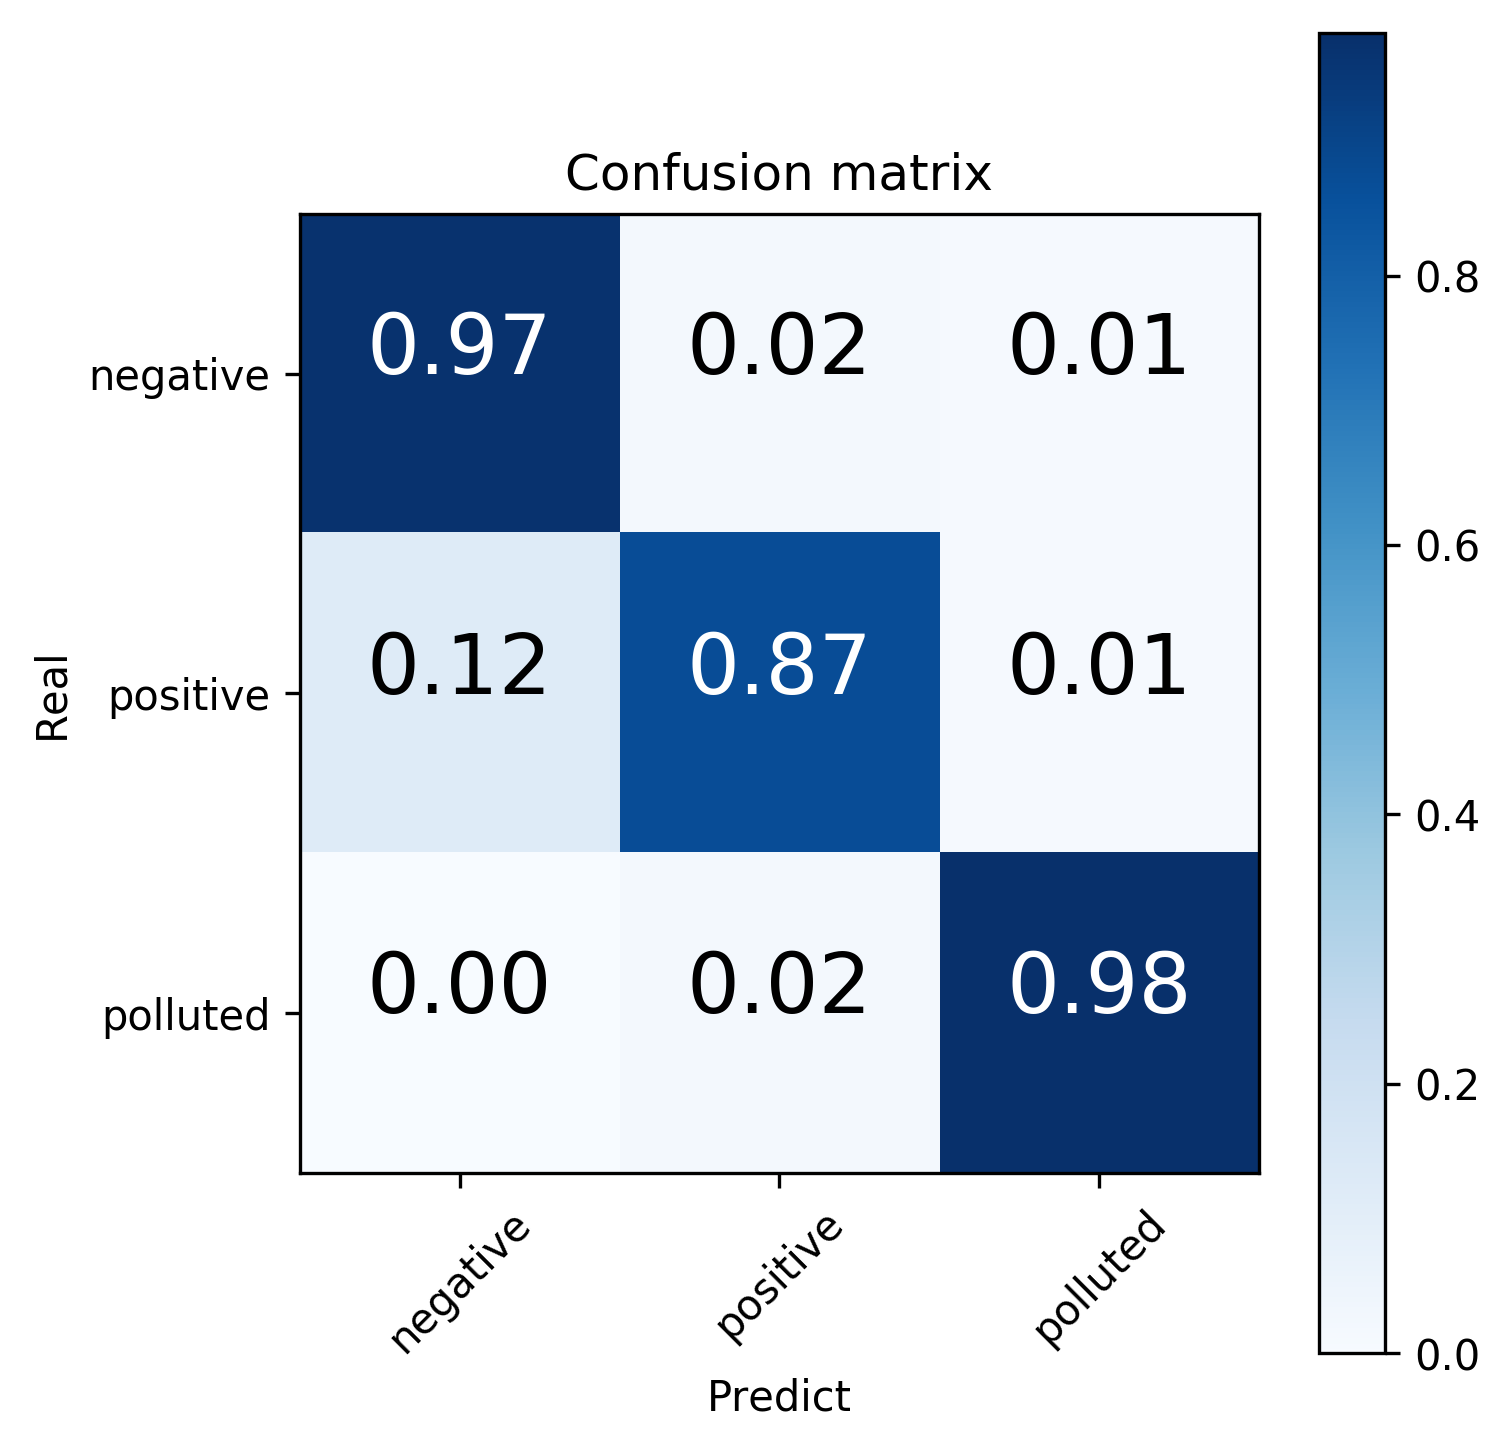


 CONFUSION MATRIX
[[0.97 0.03]
 [0.06 0.94]]


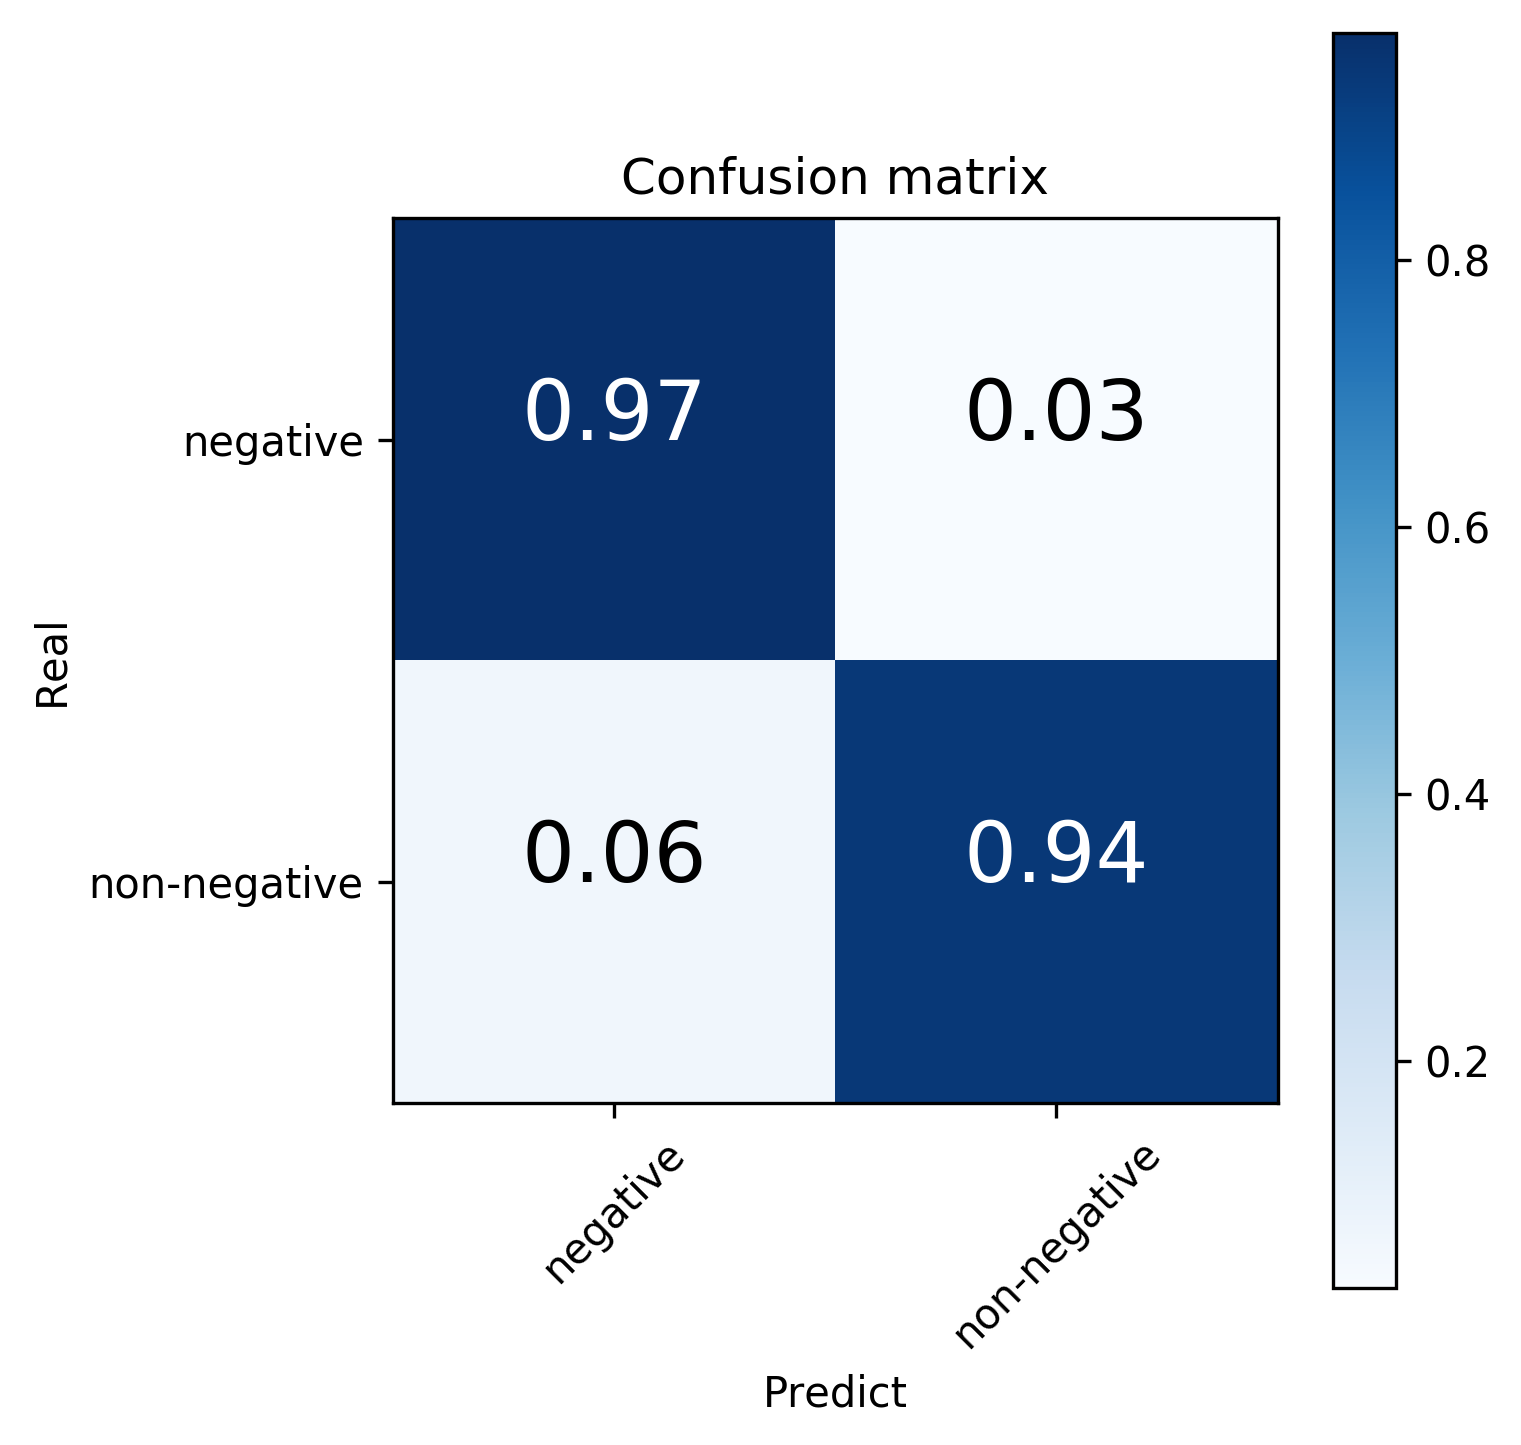

nn recall: 0.94
nn precision: 0.9842931937172775
nn f1 score: 0.9616368286445013


In [24]:
cm=np.array([
    [0.97, 0.02, 0.01],
    [0.12, 0.87, 0.01],
    [0.0, 0.02, 0.98]
])
cm2=np.array(
[
    [cm[0][0],sum(cm[0][1:])],
    [cm[1][0]+cm[2][0],cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]]
]
)
dataset='tstransfer_vgg_keras_2019-07-16-16:28_best'
plot_confusion_matrix_by_cm(cm,["negative","positive","polluted"],filename=dataset,save=True)
plot_confusion_matrix_by_cm(cm2,["negative","non-negative"],filename=dataset+'_2class',save=True)
r=(cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])/2
p=(cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])/((cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2])+sum(cm[0][1:]))
print("nn recall: "+str(r))
print("nn precision: "+str(p))
print("nn f1 score: "+str((2*p*r)/(p+r)))